*Рубежный контроль №1*  
Студент: Уляшин В.В.  
Группа: ИУ5-23М

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.datasets import load_wine
from sklearn.neighbors import KNeighborsClassifier 
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS 
import seaborn as sns

Задача №13.
Для набора данных проведите нормализацию для одного (произвольного) числового признака с использованием функции "обратная зависимость - 1 / X".

In [30]:
data = pd.read_csv("Customer-Churn-Records.csv")
data.shape

(10000, 18)

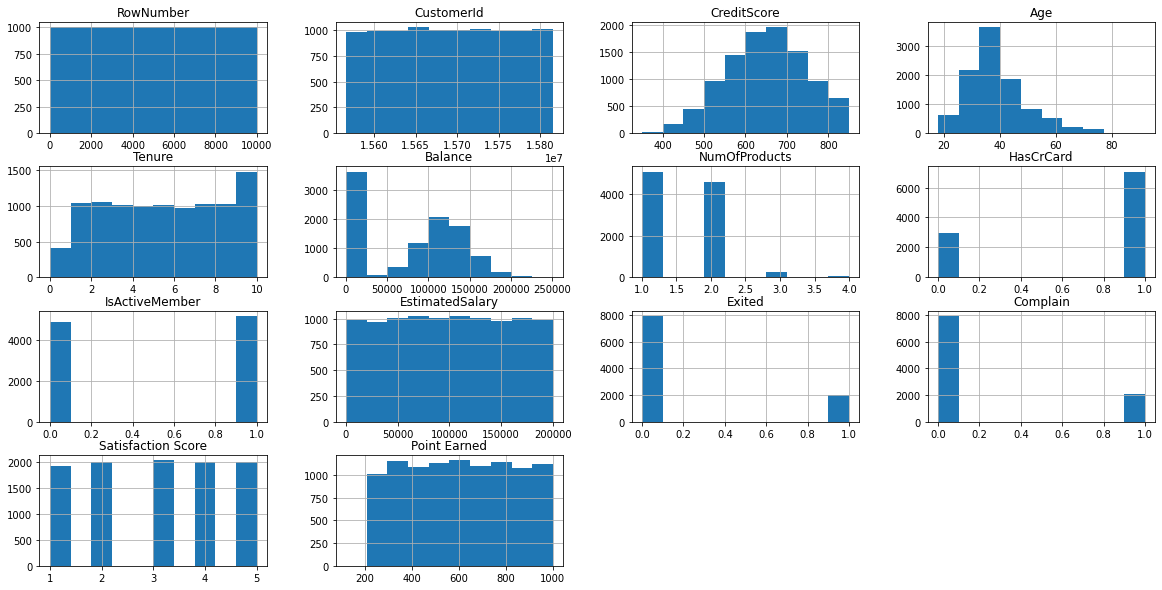

In [31]:
data.hist(figsize=(20,10))
plt.show()

In [32]:
data['normalized_feature'] = data['CreditScore'].apply(lambda x: 1 / x)

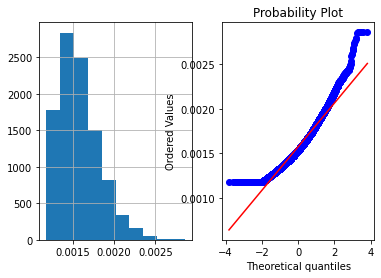

In [33]:
plt.subplot(1,2,1)
data['normalized_feature'].hist()
plt.subplot(1,2,2)
stats.probplot(data['normalized_feature'], dist="norm", plot=plt)
plt.show()

Задача №33.
Для набора данных проведите процедуру отбора признаков (feature selection). Используйте метод обертывания (wrapper method), алгоритм полного перебора (exhaustive feature selection).

In [34]:
wine = load_wine()
data = pd.DataFrame(data=wine.data, columns= wine.feature_names)
y = wine['target']

In [35]:
knn = KNeighborsClassifier(n_neighbors=3)
efs1 = EFS(knn,
            min_features=2,
            max_features=4,
            scoring='accuracy',
            print_progress=True,
            cv=5)
efs1 = efs1.fit(data, y)

Features: 1079/1079

In [36]:
print('Best accuracy score: %.2f' % efs1.best_score_)
print('Best subset:', efs1.best_feature_names_)

Best accuracy score: 0.94
Best subset: ('alcohol', 'total_phenols', 'flavanoids', 'color_intensity')


In [37]:
knn = KNeighborsClassifier(n_neighbors=3)
efs1 = EFS(knn,
            min_features=1,
            max_features=2,
            scoring='accuracy',
            print_progress=True,
            cv=5)
efs1 = efs1.fit(data, y)

Features: 91/91

In [38]:
print('Best accuracy score: %.2f' % efs1.best_score_)
print('Best subset:', efs1.best_feature_names_)

Best accuracy score: 0.93
Best subset: ('flavanoids', 'color_intensity')


Для студентов групп ИУ5-23М, ИУ5И-23М - для произвольной колонки данных построить график "Ящик с усами (boxplot)".

In [39]:
data = load_wine()
df = pd.DataFrame(data=data.data, columns=wine.feature_names)
df['target'] = wine.target

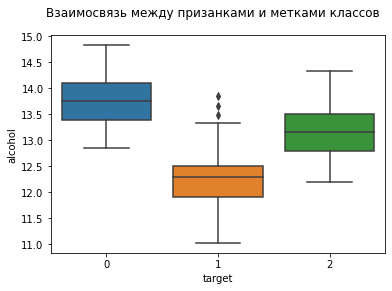

In [40]:
sns.boxplot(data=df, x='target', y='alcohol')
plt.suptitle('Взаимосвязь между призанками и метками классов')
plt.show()